In [ ]:
%%capture
!pip install catboost

In [ ]:
# Warning Libraries
import warnings
warnings.filterwarnings("ignore")
# Scientific and Data Manipulation Libraries
import pandas as pd
import numpy as np
import math
import gc
import os
# Data Preprocessing, Machine Learning and Metrics Libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedShuffleSplit
from numpy import sort
from sklearn.feature_selection import SelectFromModel
# Boosting Algorithms
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
#Deep Learning libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSN AI bootcamp/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSN AI bootcamp/Test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       672 non-null    object 
 1   Year_of_Birth            672 non-null    int64  
 2   Education_Level          672 non-null    object 
 3   Marital_Status           672 non-null    object 
 4   Disposable_Income        664 non-null    float64
 5   No_of_Kids_in_home       672 non-null    int64  
 6   No_of_Teen_in_home       672 non-null    int64  
 7   Date_Customer            672 non-null    object 
 8   Recency                  672 non-null    int64  
 9   Discounted_Purchases     672 non-null    int64  
 10  WebPurchases             672 non-null    int64  
 11  CatalogPurchases         672 non-null    int64  
 12  StorePurchases           672 non-null    int64  
 13  Amount_on_Wines          672 non-null    int64  
 14  Amount_on_Fruits         6

In [ ]:
train.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,29.091199,168.376276,37.166454,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,39.565637,233.419980,53.994951,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,4.000000,15.000000,3.000000,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,11.000000,64.000000,12.000000,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,36.000000,232.000000,49.250000,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,202.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
count,672.000000,664.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,1969.181548,63434.170482,0.406250,0.526786,57.744048,2.400298,4.279762,2.653274,5.992560,322.342262,29.794643,163.622024,38.363095,27.675595,44.681548,5.293155,0.072917,0.078869,0.055060,0.063988,0.014881,0.011905
std,12.116416,25276.585476,0.532259,0.545293,29.321893,1.919125,2.782585,2.622899,3.221797,328.037431,40.279494,206.752060,56.112424,42.275184,53.520249,2.328867,0.260193,0.269735,0.228266,0.244914,0.121167,0.108538
min,1894.000000,5313.600000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,44219.700000,0.000000,0.000000,33.000000,1.000000,2.000000,1.000000,3.000000,35.750000,5.000000,17.000000,2.750000,2.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,64007.400000,0.000000,1.000000,58.000000,2.000000,4.000000,2.000000,5.000000,209.500000,11.000000,73.000000,11.000000,9.000000,24.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1978.000000,83466.300000,1.000000,1.000000,84.000000,3.000000,6.000000,4.000000,8.000000,514.750000,36.000000,230.500000,50.000000,33.250000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,194876.400000,2.000000,2.000000,106.000000,15.000000,25.000000,11.000000,13.000000,1483.000000,202.000000,981.000000,250.000000,198.000000,321.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


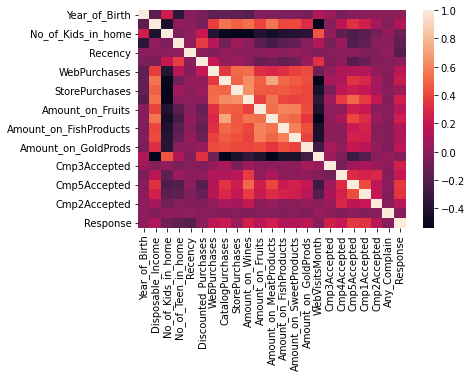

In [ ]:
sns.heatmap(train.corr());

In [ ]:
# Removes Data Duplicates while Retaining the First one
def remove_duplicate(data):
    data.drop_duplicates(keep="first", inplace=True)
    return "Checked Duplicates"

# Removes Duplicates from train data
remove_duplicate(train)

'Checked Duplicates'

In [ ]:
train.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [ ]:
train['Disposable_Income'] = train['Disposable_Income'].fillna(60964.200000)

In [ ]:
test['Disposable_Income'] = test['Disposable_Income'].fillna(64007.400000)

In [ ]:
train.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Response                   0
dtype: int64

In [ ]:
#Convert Datetime
train['Date_Customer'] = pd.to_datetime(train['Date_Customer'])
test['Date_Customer'] = pd.to_datetime(test['Date_Customer'])

In [ ]:
train['Date_Customer_Year'] = train['Date_Customer'].dt.year
train['Date_Customer_Month'] = train['Date_Customer'].dt.month
train['Date_Customer_Day'] = train['Date_Customer'].dt.day
train['Date_Customer_dayofweek'] = train['Date_Customer'].dt.dayofweek

test['Date_Customer_Year'] = test['Date_Customer'].dt.year
test['Date_Customer_Month'] = test['Date_Customer'].dt.month
test['Date_Customer_Day'] = test['Date_Customer'].dt.day
test['Date_Customer_dayofweek'] = test['Date_Customer'].dt.dayofweek

In [ ]:
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Date_Customer_Year,Date_Customer_Month,Date_Customer_Day,Date_Customer_dayofweek
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,2014,6,22,6
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,2013,1,8,1
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,2013,11,21,3
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,2013,9,13,4
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,2014,1,21,1


In [ ]:
train['Age'] = 2021 - train['Year_of_Birth']
test['Age'] = 2021 - test['Year_of_Birth']

In [ ]:
train['total_children'] = train['No_of_Kids_in_home'] + train['No_of_Teen_in_home']
train['total_purchaces'] = train['Discounted_Purchases'] + train['WebPurchases'] + train['CatalogPurchases'] + train['StorePurchases']
train['total_amount_bought'] = train['Amount_on_Wines'] + train['Amount_on_Fruits'] + train['Amount_on_MeatProducts'] + train['Amount_on_FishProducts'] + train['Amount_on_SweetProducts'] + train['Amount_on_GoldProds']
train['Recency_week'] = train['Recency'] / 7

test['total_children'] = test['No_of_Kids_in_home'] + test['No_of_Teen_in_home']
test['total_purchaces'] = test['Discounted_Purchases'] + test['WebPurchases'] + test['CatalogPurchases'] + test['StorePurchases']
test['total_amount_bought'] = test['Amount_on_Wines'] + test['Amount_on_Fruits'] + test['Amount_on_MeatProducts'] + test['Amount_on_FishProducts'] + test['Amount_on_SweetProducts'] + test['Amount_on_GoldProds']
test['Recency_week'] = test['Recency'] / 7


In [ ]:
train['Income_level'] = train['Disposable_Income']/train['total_amount_bought']
train['total_cmp_accepted'] = train['Cmp1Accepted'] + train['Cmp2Accepted'] + train['Cmp3Accepted'] + train['Cmp4Accepted'] + train['Cmp5Accepted']
train['cmp_accepted_mean'] = (train['Cmp1Accepted'] + train['Cmp2Accepted'] + train['Cmp3Accepted'] + train['Cmp4Accepted'] + train['Cmp5Accepted']) / 5

test['Income_level'] = test['Disposable_Income']/test['total_amount_bought']
test['total_cmp_accepted'] = test['Cmp1Accepted'] + test['Cmp2Accepted'] + test['Cmp3Accepted'] + test['Cmp4Accepted'] + test['Cmp5Accepted']
test['cmp_accepted_mean'] = (test['Cmp1Accepted'] + test['Cmp2Accepted'] + test['Cmp3Accepted'] + test['Cmp4Accepted'] + test['Cmp5Accepted']) / 5

In [ ]:
train.Marital_Status = train.Marital_Status.apply(lambda x: 'Married' if 'Together' in x else x)
train.Marital_Status = train.Marital_Status.apply(lambda x: 'Single' if 'YOLO' in x else x)

In [ ]:
test.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Date_Customer_Year,Date_Customer_Month,Date_Customer_Day,Date_Customer_dayofweek,Age,total_children,total_purchaces,total_amount_bought,Recency_week,Income_level,total_cmp_accepted,cmp_accepted_mean
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,1969.181548,63440.994643,0.406250,0.526786,57.744048,2.400298,4.279762,2.653274,5.992560,322.342262,29.794643,163.622024,38.363095,27.675595,44.681548,5.293155,0.072917,0.078869,0.055060,0.063988,0.014881,0.011905,2013.049107,6.406250,15.275298,2.870536,51.818452,0.933036,15.325893,626.479167,8.249150,324.041552,0.285714,0.057143
std,12.116416,25125.530599,0.532259,0.545293,29.321893,1.919125,2.782585,2.622899,3.221797,328.037431,40.279494,206.752060,56.112424,42.275184,53.520249,2.328867,0.260193,0.269735,0.228266,0.244914,0.121167,0.108538,0.683398,3.499221,8.786596,1.978926,12.116416,0.760409,7.506940,584.201596,4.188842,412.314033,0.656440,0.131288
min,1894.000000,5313.600000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000,0.000000,24.000000,0.000000,0.000000,14.000000,1.000000,14.478474,0.000000,0.000000
25%,1960.000000,44376.300000,0.000000,0.000000,33.000000,1.000000,2.000000,1.000000,3.000000,35.750000,5.000000,17.000000,2.750000,2.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,3.750000,8.000000,1.000000,43.000000,0.000000,8.000000,86.750000,4.714286,75.655975,0.000000,0.000000
50%,1970.000000,64007.400000,0.000000,1.000000,58.000000,2.000000,4.000000,2.000000,5.000000,209.500000,11.000000,73.000000,11.000000,9.000000,24.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,6.000000,15.000000,3.000000,51.000000,1.000000,16.000000,444.500000,8.285714,138.162517,0.000000,0.000000
75%,1978.000000,83207.100000,1.000000,1.000000,84.000000,3.000000,6.000000,4.000000,8.000000,514.750000,36.000000,230.500000,50.000000,33.250000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,10.000000,23.000000,5.000000,61.000000,1.000000,21.000000,1073.000000,12.000000,431.883364,0.000000,0.000000
max,1997.000000,194876.400000,2.000000,2.000000,106.000000,15.000000,25.000000,11.000000,13.000000,1483.000000,202.000000,981.000000,250.000000,198.000000,321.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,12.000000,31.000000,6.000000,127.000000,3.000000,39.000000,2533.000000,15.142857,2723.300000,4.000000,0.800000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 0 to 1567
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       1568 non-null   object        
 1   Year_of_Birth            1568 non-null   int64         
 2   Education_Level          1568 non-null   object        
 3   Marital_Status           1568 non-null   object        
 4   Disposable_Income        1568 non-null   float64       
 5   No_of_Kids_in_home       1568 non-null   int64         
 6   No_of_Teen_in_home       1568 non-null   int64         
 7   Date_Customer            1568 non-null   datetime64[ns]
 8   Recency                  1568 non-null   int64         
 9   Discounted_Purchases     1568 non-null   int64         
 10  WebPurchases             1568 non-null   int64         
 11  CatalogPurchases         1568 non-null   int64         
 12  StorePurchases           1568 non-

In [ ]:
#Create submission file using an empty/dummy dataframe
sub_file = pd.DataFrame(columns=['ID', 'Response'])
sub_file.head() 

,ID,Response


In [ ]:
#Save test ID in a copy for creating submission file later
sub_file.ID = test.ID
sub_file.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [ ]:
#Separate Target and features
y = train.Response
X = train

In [ ]:
#drop columns not needed from the train and test set
X.drop('Response', axis=1, inplace=True)
X.drop('Date_Customer', axis=1, inplace=True)
X.drop('ID', axis=1, inplace=True)                   
  
test.drop('Date_Customer', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)                    


In [ ]:
# We can separate catgorical and numerical column
#categ_cols == categorical columns . Date column excluded
categ_cols = X.select_dtypes(include=['object', 'category']).columns

# num column == numerical columns + date column included
num_cols = [col for col in X.columns if col not in categ_cols]
print(f'The Categorical Columns are: {categ_cols}')
print(f'The Numerical Columns are: {num_cols}')

The Categorical Columns are: Index(['Education_Level', 'Marital_Status'], dtype='object')
The Numerical Columns are: ['Year_of_Birth', 'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home', 'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth', 'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted', 'Cmp2Accepted', 'Any_Complain', 'Date_Customer_Year', 'Date_Customer_Month', 'Date_Customer_Day', 'Date_Customer_dayofweek', 'Age', 'total_children', 'total_purchaces', 'total_amount_bought', 'Recency_week', 'Income_level', 'total_cmp_accepted', 'cmp_accepted_mean']


In [ ]:
# label encoding 
le = LabelEncoder()
for i in categ_cols:
  train[i] = le.fit_transform(X[i])
  test[i] = le.fit_transform(test[i])
X.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Date_Customer_Year,Date_Customer_Month,Date_Customer_Day,Date_Customer_dayofweek,Age,total_children,total_purchaces,total_amount_bought,Recency_week,Income_level,total_cmp_accepted,cmp_accepted_mean
0,1955,2,2,77504.4,1,1,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,2014,6,22,6,66,2,8,116,8.000000,668.141379,0,0.0
1,1958,2,3,56784.0,0,1,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,2013,1,8,1,63,1,20,422,2.428571,134.559242,0,0.0
2,1962,2,4,103714.8,0,0,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,2013,11,21,3,59,0,18,1457,2.428571,71.183802,1,0.2
3,1979,0,4,46311.6,1,0,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,2013,9,13,4,42,1,11,185,7.000000,250.332973,0,0.0
4,1959,2,3,87486.0,0,0,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,2014,1,21,1,62,0,20,1523,8.428571,57.443204,1,0.2


In [ ]:
X.shape

(1568, 36)

In [ ]:
test.shape

(672, 36)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 0 to 1567
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_of_Birth            1568 non-null   int64  
 1   Education_Level          1568 non-null   int64  
 2   Marital_Status           1568 non-null   int64  
 3   Disposable_Income        1568 non-null   float64
 4   No_of_Kids_in_home       1568 non-null   int64  
 5   No_of_Teen_in_home       1568 non-null   int64  
 6   Recency                  1568 non-null   int64  
 7   Discounted_Purchases     1568 non-null   int64  
 8   WebPurchases             1568 non-null   int64  
 9   CatalogPurchases         1568 non-null   int64  
 10  StorePurchases           1568 non-null   int64  
 11  Amount_on_Wines          1568 non-null   int64  
 12  Amount_on_Fruits         1568 non-null   int64  
 13  Amount_on_MeatProducts   1568 non-null   int64  
 14  Amount_on_FishProducts  

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_of_Birth            672 non-null    int64  
 1   Education_Level          672 non-null    int64  
 2   Marital_Status           672 non-null    int64  
 3   Disposable_Income        672 non-null    float64
 4   No_of_Kids_in_home       672 non-null    int64  
 5   No_of_Teen_in_home       672 non-null    int64  
 6   Recency                  672 non-null    int64  
 7   Discounted_Purchases     672 non-null    int64  
 8   WebPurchases             672 non-null    int64  
 9   CatalogPurchases         672 non-null    int64  
 10  StorePurchases           672 non-null    int64  
 11  Amount_on_Wines          672 non-null    int64  
 12  Amount_on_Fruits         672 non-null    int64  
 13  Amount_on_MeatProducts   672 non-null    int64  
 14  Amount_on_FishProducts   6

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)
test_scaled = scaler.fit(test).transform(test)

In [ ]:
splits = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
splits.get_n_splits(X_scaled, y)

5

In [ ]:
for train_index, test_index in splits.split(X_scaled, y):
    x_train, x_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
xg_model = XGBClassifier(learning_rate =0.1,n_estimators=494,max_depth=5,subsample = 0.70,verbosity = 0,scale_pos_weight = 2.5,updater ="grow_histmaker",base_score  = 0.2)
xg_model.fit(x_train, y_train)
xg_pred = xg_model.predict(x_test)
f1_score(xg_pred, y_test)

0.6526315789473683

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
f1_score(rf_pred, y_test)

0.5194805194805195

In [ ]:
light_model = LGBMClassifier()
light_model.fit(x_train, y_train)
light_pred = light_model.predict(x_test)
f1_score(light_pred, y_test)

0.6506024096385543

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
f1_score(lr_pred,y_test)

0.6236559139784946

In [ ]:
cat_model = CatBoostClassifier()
cat_model.fit(x_train, y_train)
cat_pred = cat_model.predict(x_test)
f1_score(cat_pred, y_test)

Learning rate set to 0.011348
0:	learn: 0.6830806	total: 130ms	remaining: 2m 9s
1:	learn: 0.6726136	total: 231ms	remaining: 1m 55s
2:	learn: 0.6623952	total: 324ms	remaining: 1m 47s
3:	learn: 0.6540778	total: 415ms	remaining: 1m 43s
4:	learn: 0.6457728	total: 510ms	remaining: 1m 41s
5:	learn: 0.6367638	total: 615ms	remaining: 1m 41s
6:	learn: 0.6285524	total: 706ms	remaining: 1m 40s
7:	learn: 0.6202078	total: 799ms	remaining: 1m 39s
8:	learn: 0.6115893	total: 895ms	remaining: 1m 38s
9:	learn: 0.6027817	total: 985ms	remaining: 1m 37s
10:	learn: 0.5943732	total: 1.07s	remaining: 1m 36s
11:	learn: 0.5869886	total: 1.18s	remaining: 1m 36s
12:	learn: 0.5781257	total: 1.27s	remaining: 1m 36s
13:	learn: 0.5706811	total: 1.36s	remaining: 1m 36s
14:	learn: 0.5631316	total: 1.46s	remaining: 1m 35s
15:	learn: 0.5569307	total: 1.54s	remaining: 1m 34s
16:	learn: 0.5501313	total: 1.64s	remaining: 1m 34s
17:	learn: 0.5441269	total: 1.72s	remaining: 1m 34s
18:	learn: 0.5380507	total: 1.82s	remaining: 

0.5882352941176472

In [ ]:
 voting_model = VotingClassifier(estimators=[
...        ('lgb', light_model), ('rfo', rf), ('cat', cat_model), ('xg', xg_model)],
...        voting='soft',
...        flatten_transform=True)
 
voting_model.fit(x_train, y_train)
voting_pred = voting_model.predict(x_test)
f1_score(voting_pred, y_test)

Learning rate set to 0.011348
0:	learn: 0.6831338	total: 3.52ms	remaining: 3.51s
1:	learn: 0.6717993	total: 7.02ms	remaining: 3.5s
2:	learn: 0.6632726	total: 10.5ms	remaining: 3.49s
3:	learn: 0.6556259	total: 13.8ms	remaining: 3.45s
4:	learn: 0.6478398	total: 17.2ms	remaining: 3.43s
5:	learn: 0.6388570	total: 20.7ms	remaining: 3.42s
6:	learn: 0.6305992	total: 24.1ms	remaining: 3.42s
7:	learn: 0.6206759	total: 27.5ms	remaining: 3.41s
8:	learn: 0.6105431	total: 30.9ms	remaining: 3.4s
9:	learn: 0.6024568	total: 34.3ms	remaining: 3.39s
10:	learn: 0.5950041	total: 37.7ms	remaining: 3.39s
11:	learn: 0.5865213	total: 41.2ms	remaining: 3.39s
12:	learn: 0.5792862	total: 46ms	remaining: 3.49s
13:	learn: 0.5727330	total: 51.8ms	remaining: 3.65s
14:	learn: 0.5667352	total: 57.9ms	remaining: 3.8s
15:	learn: 0.5578483	total: 61.7ms	remaining: 3.79s
16:	learn: 0.5517469	total: 65.3ms	remaining: 3.77s
17:	learn: 0.5451865	total: 68.7ms	remaining: 3.75s
18:	learn: 0.5384658	total: 72.1ms	remaining: 3.7

0.6744186046511628

<Figure size 1280x960 with 0 Axes>

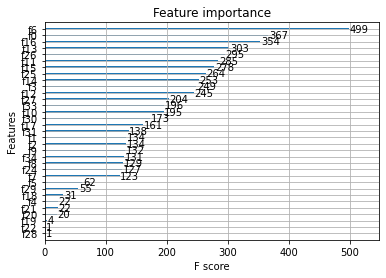

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(16, 12), dpi=80)

from xgboost import plot_importance
plot_importance(xg_model)
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 0 to 1567
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_of_Birth            1568 non-null   int64  
 1   Education_Level          1568 non-null   int64  
 2   Marital_Status           1568 non-null   int64  
 3   Disposable_Income        1568 non-null   float64
 4   No_of_Kids_in_home       1568 non-null   int64  
 5   No_of_Teen_in_home       1568 non-null   int64  
 6   Recency                  1568 non-null   int64  
 7   Discounted_Purchases     1568 non-null   int64  
 8   WebPurchases             1568 non-null   int64  
 9   CatalogPurchases         1568 non-null   int64  
 10  StorePurchases           1568 non-null   int64  
 11  Amount_on_Wines          1568 non-null   int64  
 12  Amount_on_Fruits         1568 non-null   int64  
 13  Amount_on_MeatProducts   1568 non-null   int64  
 14  Amount_on_FishProducts  

In [ ]:
voting_test = voting_model.predict(test_scaled)
sub_file.Response = voting_test
sub_file.to_csv('vote_model.csv', index=False)

In [ ]:
xg_test = xg_model.predict(test_scaled)
sub_file.Response = xg_test
sub_file.to_csv('xg_model.csv', index=False)

In [ ]:
cat_test = cat_model.predict(test_scaled)
sub_file.Response = cat_test
sub_file.to_csv('cat_model.csv', index=False)

In [ ]:
light_test = light_model.predict(test_scaled)
sub_file.Response = light_test
sub_file.to_csv('light_model.csv', index=False)

In [ ]:
rf_test = rf.predict(test_scaled)
sub_file.Response = rf_test
sub_file.to_csv('rf_model.csv', index=False)

In [ ]:
lr_test = lr.predict(test_scaled)
sub_file.Response = lr_test
sub_file.to_csv('lr_model.csv', index=False)

In [ ]:
from google.colab import files
files.download('cat_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('light_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('rf_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('lr_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('vote_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>